In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.zip')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.zip')

In [6]:
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [7]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61571 non-null  object 
 1   cid           61571 non-null  float64
 2   transactions  61571 non-null  int64  
 3   revenue       61571 non-null  int64  
 4   group         61571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


Постройте таблицу со следующими ежедневными показателями:<br>
- количество посетителей сайта;<br>
- суммарное число транзакций;<br>
- общая сумма покупок (выручка).<br>
<br>
Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.<br>
<br>
Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

In [8]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')


Обратите внимание на то, что здесь используется reset_index(). В противном случае столбец type становится индексным столбцом. В большинстве случаев я рекомендую делать то же самое.

In [9]:
sample_a_grouped = sample_a.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
sample_a_grouped.head()

,date,users_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [10]:
sample_b_grouped = sample_b.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
sample_b_grouped.head()

,date,users_count,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


In [11]:
mask = sample_a_grouped['date'] == '2020-11-08'
sample_a_grouped[mask]

,date,users_count,transactions,revenue
2,2020-11-08,3354,25,846051


Добавьте в каждую из таблиц кумулятивные метрики:<br>
<br>
кумулятивное количество посетителей сайта;<br>
кумулятивное суммарное число транзакций;<br>
кумулятивная общая сумма покупок (кумулятивная выручка).<br>
Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).<br>

In [12]:
# кумулятивное количество посетителей сайта;
sample_a_grouped['users_cum'] = sample_a_grouped['users_count'].cumsum()
sample_b_grouped['users_cum'] = sample_b_grouped['users_count'].cumsum()

# кумулятивное суммарное число транзакций;
sample_a_grouped['transactions_cum'] = sample_a_grouped['transactions'].cumsum()
sample_b_grouped['transactions_cum'] = sample_b_grouped['transactions'].cumsum()

# кумулятивная общая сумма покупок (кумулятивная выручка).
sample_a_grouped['revenue_cum'] = sample_a_grouped['revenue'].cumsum()
sample_b_grouped['revenue_cum'] = sample_b_grouped['revenue'].cumsum()

# Рассчитайте кумулятивную конверсию действия покупки (в процентах) 
sample_a_grouped['cum_conversion'] = 100 * sample_a_grouped['transactions_cum'] / sample_a_grouped['users_cum']
sample_b_grouped['cum_conversion'] = 100 * sample_b_grouped['transactions_cum'] / sample_b_grouped['users_cum']

# и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).
sample_a_grouped['revenue_avg_cum'] = sample_a_grouped['revenue_cum'] / sample_a_grouped['transactions_cum']
sample_b_grouped['revenue_avg_cum'] = sample_b_grouped['revenue_cum'] / sample_b_grouped['transactions_cum']

In [13]:
print (round(sample_a_grouped['cum_conversion'].mean(),2))
print (round(sample_b_grouped['cum_conversion'].mean(),2))

0.71
0.76


Постройте графики кумулятивной конверсии в каждой группе.

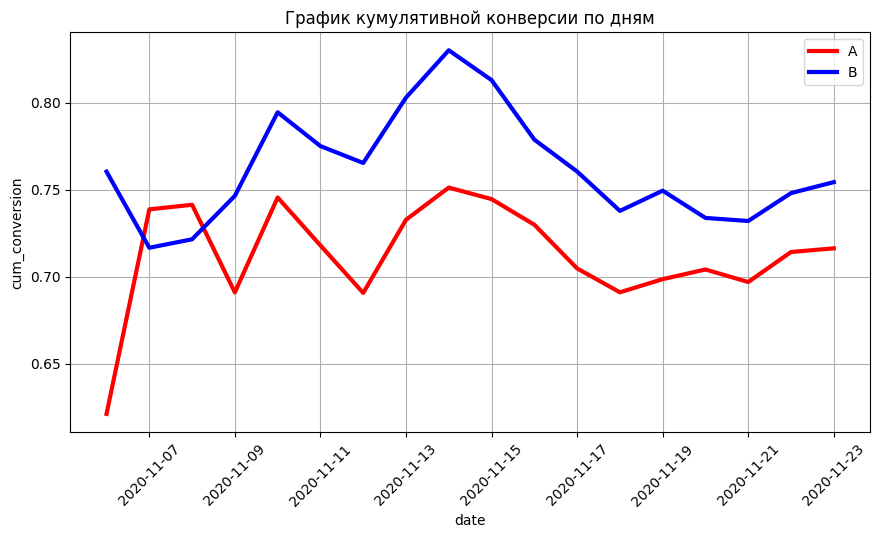

In [14]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=sample_a_grouped, ax=ax,color='red', lw=3, label = 'A')
sns.lineplot(x='date', y='cum_conversion', data=sample_b_grouped, ax=ax,color='blue', lw=3, label = 'B')
#plt.legend(labels=['A','B'])
plt.legend()
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Постройте графики кумулятивного среднего чека в каждой группе

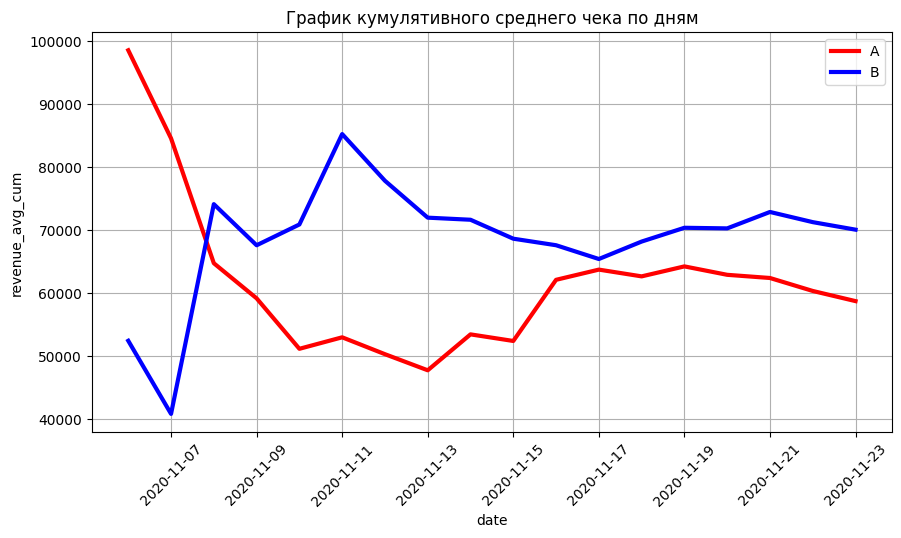

In [15]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='revenue_avg_cum', data=sample_a_grouped, ax=ax,color='red', lw=3, label = 'A')
sns.lineplot(x='date', y='revenue_avg_cum', data=sample_b_grouped, ax=ax,color='blue', lw=3, label = 'B')

plt.legend()
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

# Задание 5.2 - 5.4

## Z-тест

In [16]:
from statsmodels.stats.proportion import proportions_ztest

В функцию необходимо передать три параметра:<br>
count — список из общего числа транзакций в группах A и B (суммы по столбцам transactions);<br>
nobs — число наблюдений в группах A и B (количество значений в столбце cid);<br>
alternative — в качестве значения необходимо взять 'smaller'.<br>

In [17]:
alpha = 0.05 # уровень значимости

# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=[sample_a['transactions'].sum(), sample_b['transactions'].sum()], # число «успехов»
    nobs=[sample_a['cid'].count(), sample_b['cid'].count()], # общее число наблюдений
    alternative='two-sided',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value:  0.44
# У нас нет оснований отвергнуть нулевую гипотезу

p-value:  0.44
У нас нет оснований отвергнуть нулевую гипотезу


Задание 5.3<br>
<br>
Проверьте гипотезу о нормальности распределений ежедневного среднего чека в контрольной и тестовой группах с помощью критерия Шапиро — Уилка. В качестве уровня значимости возьмите .

In [18]:
daily_sample_a = sample_a.groupby('date')[['transactions', 'revenue']].sum()
daily_sample_a['mean_check'] = daily_sample_a['revenue']/daily_sample_a['transactions']
daily_sample_b = sample_b.groupby('date')[['transactions', 'revenue']].sum()
daily_sample_b['mean_check'] = daily_sample_b['revenue']/daily_sample_a['transactions']

daily_sample_a.head()

,transactions,revenue,mean_check
date,,,
2020-11-06,16,1577279,98579.937500
2020-11-07,23,1721886,74864.608696
2020-11-08,25,846051,33842.040000
2020-11-09,18,708830,39379.444444
2020-11-10,29,826984,28516.689655


In [19]:
from scipy.stats import shapiro

alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(daily_sample_a['mean_check'])
shapiro_result_b = shapiro(daily_sample_b['mean_check'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

p-value группы А 0.01
p-value группы B 0.03
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального


Задание 5.4<br>
<br>
С помощью критерия Манна — Уитни проанализируйте результаты проведённого A/B-тестирования и определите, какой из вариантов дизайна (A или B) более предпочтителен по метрике ежедневного среднего чека. В качестве уровня значимости возьмите . Используйте функцию mannwhitneyu() из модуля scipy.stats.

In [20]:
from scipy.stats import mannwhitneyu

alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=daily_sample_a['mean_check'],
    y=daily_sample_b['mean_check'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.12
У нас нет оснований отвергнуть нулевую гипотезу


In [21]:
from scipy.stats import mannwhitneyu

alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=daily_sample_a['mean_check'],
    y=daily_sample_b['mean_check'],
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.06
У нас нет оснований отвергнуть нулевую гипотезу


In [22]:
from scipy.stats import mannwhitneyu

alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=daily_sample_a['mean_check'],
    y=daily_sample_b['mean_check'],
    alternative='greater'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.94
У нас нет оснований отвергнуть нулевую гипотезу


# Задание 6.6

Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. На случайной выборке из 25 домохозяйств был посчитан средний размер выплаченного налога, и он составил 3 540. Также известно выборочное отклонение величины подоходного налога, равное 1 150.

Необходимо найти 90 %-ый доверительный интервал для истинного среднего значения налоговых выплат за год. Используйте формулу с t-критическим.

In [24]:
n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное среднее
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости

from scipy.stats import t

# строим доверительный интервал для среднего при неизвестном СКО
lower, upper = t.interval(gamma, df=k, loc=x_mean, scale=x_std/(n ** 0.5))
print('Доверительный интервал: {}'.format((round(lower), round(upper))))
# Доверительный интервал: (1778, 2222)

Доверительный интервал: (3146, 3934)


# Задача 6.9

In [35]:
from scipy.stats import norm

def proportion_conf_interval(x_p, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z-критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 # погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

In [36]:
round (132/189,3)

0.698

In [37]:
# размеры выборок групп А и B
n = 189
# выборочная пропорция групп A и B
n_positive = 132 # число положительных исходов
x_p = n_positive/n # выборочная пропорция
gamma = 0.9

print('Выборочная пропорция: {}'.format(round(x_p, 3)))

# строим доверительный интервал для разности пропорций
lower_bound, upper_bound  = proportion_conf_interval(
    x_p=x_p, # выборочная пропорция
    n=n, # размер выборки
    gamma=gamma # уровень надёжности
)


#выводим результат
print('Доверительный интервал: {}'.format((round(lower_bound * 100, 2), round(upper_bound * 100, 2))))

Выборочная пропорция: 0.698
Доверительный интервал: (64.35, 75.33)


# Задача 6.10

Проводится A/B-тестирование вариантов отображения страницы корзины на сайте интернет-магазина. Есть два варианта отображения страницы: с товарными рекомендациями «Хиты продаж» и персональными, подобранными под интерес конкретно этого пользователя. Метрикой является конверсия действия «добавить в корзину товар из рекомендаций». Были собраны следующие данные:

Группа

Число добавленных в корзину товаров

Размер выборки

А (Персональные скидки)

45

1000

B (Хиты продаж)

50

1000

Постройте 95 %-ый доверительный интервал разности полученных конверсий. Ответ приведите в процентах и округлите границы интервала до второго знака после запятой. При расчёте используйте z-критическое.

In [38]:
def diff_proportion_conf_interval(x_p, n, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = x_p[1] - x_p[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) #z-критическое
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] * (1 - x_p[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из  границ интервала
    return lower_bound, upper_bound


n = 1000 # размер выборки обеих групп
n_positive_a = 45 # число пользователей, совершивших конверсию, в группе А
n_positive_b = 50 # число пользователей, совершивших конверсию, в группе B
xp_a = n_positive_a/n # выборочная пропорция группы A
xp_b = n_positive_b/n # выборочная пропорция группы B


# строим доверительный интервал для разности пропорций
lower_bound, upper_bound = diff_proportion_conf_interval(
    x_p=[xp_a, xp_b],
    n=[n, n]
)


# выводим результат
print('Доверительный интервал для разности конверсий: {}'.format((round(lower_bound*100, 2), round(upper_bound*100, 2))))

Доверительный интервал для разности конверсий: (-1.36, 2.36)
